# EDA

### El siguiente analisis exploratorio es realizado con el objetivo de que sea legible y sencillo de entender, mostrando el codigo que me fue util y me ayudo a sacar las diferentes conclusiones sobre los datasets principales dados.

***Importo las librerias necesarias***

In [1458]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

***Leo el archivo .xlsx, esto devuelve un diccionario de las hojas en formato Dataframe***

In [1459]:
# Leer todas las hojas del archivo .xlsx
archivo = pd.read_excel('internet.xlsx', sheet_name=None)

# Mostrar los nombres de las hojas disponibles en el archivo
print(archivo.keys())

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])


***Verifico por hoja las columnas, veo las primeras filas y analizo un resumen estadistico.***

***La salida de la consola sera muy larga, pero se puede ver en Visual clickeando en la opcion de ver en editor de texto***

In [1460]:
for hoja, data in archivo.items():
    print("\n-----------------------")
    print(f"Hoja: {hoja}")
    print(data.info())  # Resumen de columnas y tipos de datos
    print(data.head())  # Primeras filas de la hoja
    print(data.describe())  # Resumen estadístico
    
#Clickear en "text editor" para ver el output completo


-----------------------
Hoja: Acc_vel_loc_sinrangos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB
None
      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  680 Mbps  700 Mbps  800 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  

***Busco las hojas que tienen datos relacionado a fechas***

In [1461]:
# Columnas a buscar
columnas_deseadas = ['Año']

# Filtra las hojas que contienen las columnas
hojas_filtradas = {}
for nombre_hoja, df in archivo.items():
    if all(columna in df.columns for columna in columnas_deseadas):
        hojas_filtradas[nombre_hoja] = df
        
hojas_filtradas.keys()

dict_keys(['Velocidad_sin_Rangos', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])


***Luego de revisar las hojas tanto en este archivo Jupyter como en la herramienta Excel, decidi seleccionar las siguientes hojas del archivo***

# Hojas seleccionadas

- **Accesos_por_velocidad**:
  Útil para analizar a través del tiempo la velocidad en Mbps por provincia (deberia agrupar por rangos más amplios la velocidad y agregar total).

- **Accesos_por_tecnología**:
  Información sobre la diferenciación de tecnología por provincia. Se puede utilizar con la hoja anterior (Accesos_por_velocidad) para ver cómo se relacionan las tecnologías con la velocidad.

- **Velocidad_%_por_prov**:
  Contiene datos sobre la media de bajada en Mbps (dato que se puede sumar a Velocidad_sin_Rangos).

- **Penetración_hogares y Penetración_poblacion**:
  Accesos cada 100 hogares/habitantes al servicio por provincia a través del tiempo.

- **Ingresos**:
  Datos sobre ingresos en miles de pesos, útil para explorar la relación entre la calidad del servicio y los ingresos generados por trimestre.

### Para el criterio de elección de hojas tuve en cuenta:
- Registros con datos a través del tiempo (para analizar los datos en diferentes periodos).
- Registros por provincia (dejando las tablas con localidades de lado por no cumplir con el punto anterior) y ademas facilitando el analisi siendo la variable cualitativa comun entre todas las tablas.
- Registros con datos cuantitativos relevantes y complementarios para el análisis y el calculo de los KPI's (Como Penetración_hogares o Velocidad_%_por_prov).



***Asigno cada hoja relevante a un DataFrame***

In [1462]:
accesos_por_velocidad = archivo['Accesos por velocidad']
accesos_por_tecnología = archivo['Accesos Por Tecnología']
velocidad_por_provincia = archivo['Velocidad % por prov']
penetracion_hogares = archivo['Penetracion-hogares']
penetracion_poblacion = archivo['Penetración-poblacion']
ingresos = archivo['Ingresos ']

In [1463]:
# Identificar filas a corregir, en este caso las filas de la 26 a la 49.
# Suponiendo que esas filas son del índice 25 al 48 por el indice de python

# Ajustar los índices de las filas que tienen incorrecto el año
accesos_por_velocidad.loc[24:48, 'Año'] = 2023

# Verificar los cambios
print(accesos_por_velocidad.loc[22:49, ['Año', 'Trimestre', 'Provincia']])

     Año  Trimestre            Provincia
22  2024          1     Tierra Del Fuego
23  2024          1              Tucumán
24  2023          4         Buenos Aires
25  2023          4      Capital Federal
26  2023          4            Catamarca
27  2023          4                Chaco
28  2023          4               Chubut
29  2023          4              Córdoba
30  2023          4           Corrientes
31  2023          4           Entre Ríos
32  2023          4              Formosa
33  2023          4                Jujuy
34  2023          4             La Pampa
35  2023          4             La Rioja
36  2023          4              Mendoza
37  2023          4             Misiones
38  2023          4              Neuquén
39  2023          4            Río Negro
40  2023          4                Salta
41  2023          4             San Juan
42  2023          4             San Luis
43  2023          4           Santa Cruz
44  2023          4             Santa Fe
45  2023        

***Visualizo cantidad de Nulos por DataFrame***

In [1464]:
print(accesos_por_tecnología.isnull().sum())
print(velocidad_por_provincia.isnull().sum())
print(penetracion_poblacion.isnull().sum())
print(penetracion_hogares.isnull().sum())
print(accesos_por_velocidad.isnull().sum())
print(ingresos.isnull().sum())

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo     

***Busco los datos faltantes y los elimíno***

In [1465]:
# Resultaron estar en las ultimas 2 filas
accesos_por_tecnología.tail(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
983,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1466]:
# Eliminar las últimas dos filas
accesos_por_tecnología = accesos_por_tecnología.iloc[:-2]

In [1467]:
accesos_por_tecnología

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0
...,...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
980,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


### Transformo las columnas en accesos_por_tecnología de año y trimestre que tienen un "*" al final de los datos

In [1468]:
accesos_por_tecnología.loc[:, 'Año'] = accesos_por_tecnología['Año'].astype(str).str.replace(r'\*', '', regex=True)
accesos_por_tecnología.loc[:, 'Trimestre'] = accesos_por_tecnología['Trimestre'].astype(str).str.replace(r'\*', '', regex=True)

# Recortar espacios al principio y al final de los valores de texto en todas las columnas de tipo objeto (texto)
accesos_por_tecnología = accesos_por_tecnología.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convertir las columnas 'Año' y 'Trimestre' a tipo entero
accesos_por_tecnología.loc[:, 'Año'] = pd.to_numeric(accesos_por_tecnología['Año'], errors='coerce').astype('Int64')
accesos_por_tecnología.loc[:, 'Trimestre'] = pd.to_numeric(accesos_por_tecnología['Trimestre'], errors='coerce').astype('Int64')


***Visualizo solo las columnas***

In [1469]:
# Visualizar columnas
print("penetracion_poblacion","\n",penetracion_poblacion.columns)
print("penetracion_hogares","\n",penetracion_hogares.columns)
print("accesos_por_velocidad","\n",accesos_por_velocidad.columns)
print("accesos_por_tecnología","\n",accesos_por_tecnología.columns)
print("velocidad_por_provincia","\n",velocidad_por_provincia.columns)
print("Ingresos","\n",ingresos.columns)

penetracion_poblacion 
 Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')
penetracion_hogares 
 Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')
accesos_por_velocidad 
 Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')
accesos_por_tecnología 
 Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')
velocidad_por_provincia 
 Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')
Ingresos 
 Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')


***Cambio el nombre de 'Fibra óptica'***

In [1470]:
accesos_por_tecnología.rename(columns={'Fibra óptica': 'Fibra_optica'}, inplace=True)

***Miro la cantidad por columna para evaluar una combinacion de las mismas, si ningun rango destaca en cantidad, seran combinadas.
De lo contrario se quedaran como estan para que los rangos sean mas representativos***

In [1471]:
# Filtramos el DataFrame para obtener solo los registros donde Año sea 2024 y Trimestre sea 1
df_acceso = accesos_por_velocidad[(accesos_por_velocidad['Año'] == 2024) & (accesos_por_velocidad['Trimestre'] == 1)]

# Seleccionamos las columnas de Mbps que queremos sumar
columns_to_sum = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
                '+ 30 Mbps', 'OTROS']

# Calculamos la suma total de cada columna en el DataFrame filtrado
totals = df_acceso[columns_to_sum].sum()

# Mostramos el total de cada columna
print(totals)

HASTA 512 kbps           28801.0
+ 512 Kbps - 1 Mbps      69355.0
+ 1 Mbps - 6 Mbps       866152.0
+ 6 Mbps - 10 Mbps      950930.0
+ 10 Mbps - 20 Mbps     672155.0
+ 20 Mbps - 30 Mbps     353896.0
+ 30 Mbps              8363694.0
OTROS                   328173.0
dtype: float64


***Combinamos las columnas para tener datos mas claros y eliminamos la columna "OTROS" ya que son datos sin referencias ni fundamentos***

In [1472]:
# Crear nuevas columnas agrupando las velocidades
accesos_por_velocidad['Muy Baja velocidad (Hasta 1 Mbps)'] = (accesos_por_velocidad['HASTA 512 kbps'] + 
                                                            accesos_por_velocidad['+ 512 Kbps - 1 Mbps'])

accesos_por_velocidad['Baja velocidad (De 1 a 10 Mbps)'] = (accesos_por_velocidad['+ 1 Mbps - 6 Mbps'] + 
                                                            accesos_por_velocidad['+ 6 Mbps - 10 Mbps'])

accesos_por_velocidad['Velocidad media (De 10 a 20 Mbps)'] = (accesos_por_velocidad['+ 10 Mbps - 20 Mbps'])

accesos_por_velocidad['Alta velocidad (De 20 a 30 Mbps)'] = (accesos_por_velocidad['+ 20 Mbps - 30 Mbps'])

accesos_por_velocidad['Muy alta velocidad (Mas de 30 Mbps)'] = (accesos_por_velocidad['+ 30 Mbps'])


# Eliminar las columnas originales de velocidad si ya no son necesarias
accesos_por_velocidad = accesos_por_velocidad.drop(columns=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', 
                                                            '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                                                            '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
                                                            '+ 30 Mbps', 'OTROS'])

# Verificar las primeras filas para confirmar la transformación
print(accesos_por_velocidad.head())


    Año  Trimestre        Provincia      Total  \
0  2024          1     Buenos Aires  5044557.0   
1  2024          1  Capital Federal  1504711.0   
2  2024          1        Catamarca    74933.0   
3  2024          1            Chaco   155543.0   
4  2024          1           Chubut   170676.0   

   Muy Baja velocidad (Hasta 1 Mbps)  Baja velocidad (De 1 a 10 Mbps)  \
0                            48512.0                         454410.0   
1                             5934.0                          81168.0   
2                              247.0                           6296.0   
3                              652.0                          23200.0   
4                             1194.0                          75713.0   

   Velocidad media (De 10 a 20 Mbps)  Alta velocidad (De 20 a 30 Mbps)  \
0                           241778.0                          106418.0   
1                            37369.0                            5957.0   
2                             4204.0  

***Chequeo como quedo el dataframe, viendo solo los datos del primer trimestre del 2024***

In [1473]:
# Filtramos el DataFrame para obtener los registros donde Año sea 2024 y Trimestre sea 1
df_acceso = accesos_por_velocidad[(accesos_por_velocidad['Año'] == 2024) & (accesos_por_velocidad['Trimestre'] == 1)]

# Seleccionamos las columnas de Mbps que queremos sumar
columnas_sum = ['Muy Baja velocidad (Hasta 1 Mbps)', 'Baja velocidad (De 1 a 10 Mbps)', 
                'Velocidad media (De 10 a 20 Mbps)', 'Alta velocidad (De 20 a 30 Mbps)', 
                'Muy alta velocidad (Mas de 30 Mbps)']

# Calculamos la suma total de cada columna en el DataFrame filtrado
totals = df_acceso[columnas_sum].sum()

# Mostramos el total de cada columna
print(totals)

Muy Baja velocidad (Hasta 1 Mbps)        98156.0
Baja velocidad (De 1 a 10 Mbps)        1817082.0
Velocidad media (De 10 a 20 Mbps)       672155.0
Alta velocidad (De 20 a 30 Mbps)        353896.0
Muy alta velocidad (Mas de 30 Mbps)    8363694.0
dtype: float64


***Se combinan tambien los Dataframe Penetracion poblacion y hogares, ya que son datos con metricas que van de la mano y asi compactamos mas la información.***

In [1474]:
# Combinamos penetracion_poblacion y penetracion_hogares
penetracion_total = pd.merge(penetracion_poblacion, penetracion_hogares, on=['Año', 'Trimestre', 'Provincia'], how='outer')

# Verificamos las primeras filas del DataFrame combinado
print(penetracion_total.head())



    Año  Trimestre        Provincia  Accesos por cada 100 hab  \
0  2014          1     Buenos Aires                 16.692346   
1  2014          1  Capital Federal                 42.655072   
2  2014          1        Catamarca                  6.184615   
3  2014          1            Chaco                  5.553671   
4  2014          1           Chubut                 12.703590   

   Accesos por cada 100 hogares  
0                     54.570073  
1                    112.254123  
2                     24.251751  
3                     20.718539  
4                     41.235218  


***Sacamos la columna "periodo" de el DF "ingresos" ya que la veo innecesaria y ademas convertimos la columna ingresos a tipo entero***

In [1475]:
#Eliminamos la columna
ingresos = ingresos.drop(columns=['Periodo'])

# Reemplazar comas por puntos para manejar los números decimales
ingresos['Ingresos en Pesos'] = ingresos['Ingresos (miles de pesos)'].astype(str).str.replace(',', '.', regex=False)

# Crear una nueva columna 'Ingresos en Pesos' con los valores redondeados
ingresos['Ingresos en Pesos'] = ingresos['Ingresos en Pesos'].astype(float).round().astype(int)

#Borramos la columna utilizada
ingresos = ingresos.drop(columns=['Ingresos (miles de pesos)'])

print("DF: ingresos","\n",ingresos.head(),"\n","--------------")

DF: ingresos 
     Año  Trimestre  Ingresos en Pesos
0  2024          1          280419124
1  2023          4          167376015
2  2023          3          133106593
3  2023          2          118060280
4  2033          1          104134993 
 --------------


### Agrego el dato de la media de Mbps de bajada a el DF que contiene datos relacionados (Accesos_por_velocidad)


In [1476]:
#Veo si el tipo de dato de las columnas son compatibles
print(accesos_por_velocidad.dtypes)
print(velocidad_por_provincia.dtypes)

Año                                      int64
Trimestre                                int64
Provincia                               object
Total                                  float64
Muy Baja velocidad (Hasta 1 Mbps)      float64
Baja velocidad (De 1 a 10 Mbps)        float64
Velocidad media (De 10 a 20 Mbps)      float64
Alta velocidad (De 20 a 30 Mbps)       float64
Muy alta velocidad (Mas de 30 Mbps)    float64
dtype: object
Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object


In [1477]:
# Eliminar espacios en blanco al inicio y final en la columna Provincia para evitar errores
accesos_por_velocidad['Provincia'] = accesos_por_velocidad['Provincia'].str.strip()
velocidad_por_provincia['Provincia'] = velocidad_por_provincia['Provincia'].str.strip()

#Mergeamos los dataframes desde las columnas ['Año', 'Trimestre', 'Provincia']
accesos_velocidad = pd.merge(accesos_por_velocidad, velocidad_por_provincia, on=['Año', 'Trimestre', 'Provincia'], how='outer')
display(accesos_velocidad)

,Año,Trimestre,Provincia,Total,Muy Baja velocidad (Hasta 1 Mbps),Baja velocidad (De 1 a 10 Mbps),Velocidad media (De 10 a 20 Mbps),Alta velocidad (De 20 a 30 Mbps),Muy alta velocidad (Mas de 30 Mbps),Mbps (Media de bajada)
0,2014,1,Buenos Aires,2624542.08,179713.48,2401662.12,38923.32,206.16,4037.0,3.733133
1,2014,1,Capital Federal,1301080.92,89677.52,1166342.88,38797.68,54.84,6208.0,4.024082
2,2014,1,Catamarca,24232.00,9166.00,15002.00,64.00,0.00,0.0,2.802734
3,2014,1,Chaco,62546.00,16287.00,45513.00,741.00,5.00,0.0,3.255837
4,2014,1,Chubut,68791.00,7462.00,61329.00,0.00,0.00,0.0,3.175917
...,...,...,...,...,...,...,...,...,...,...
979,2024,1,Santa Cruz,80208.00,477.00,17341.00,7182.00,7070.00,14335.0,31.600000
980,2024,1,Santa Fe,918588.00,6885.00,229324.00,58595.00,28498.00,579118.0,100.200000
981,2024,1,Santiago Del Estero,124362.00,1314.00,65639.00,24281.00,5796.00,26415.0,44.900000
982,2024,1,Tierra Del Fuego,61555.00,856.00,19843.00,12039.00,15932.00,5764.0,21.540000


***Visualizamos los dataframes definitivos a trabajar y simplificamos nombres***

In [1478]:
# Visualizar columnas
print("penetracion_total","\n",penetracion_total.columns)
print("accesos_por_velocidad","\n",accesos_por_velocidad.columns)
print("accesos_por_tecnología","\n",accesos_por_tecnología.columns)
print("Ingresos","\n",ingresos.columns)

penetracion_total 
 Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab',
       'Accesos por cada 100 hogares'],
      dtype='object')
accesos_por_velocidad 
 Index(['Año', 'Trimestre', 'Provincia', 'Total',
       'Muy Baja velocidad (Hasta 1 Mbps)', 'Baja velocidad (De 1 a 10 Mbps)',
       'Velocidad media (De 10 a 20 Mbps)', 'Alta velocidad (De 20 a 30 Mbps)',
       'Muy alta velocidad (Mas de 30 Mbps)'],
      dtype='object')
accesos_por_tecnología 
 Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra_optica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')
Ingresos 
 Index(['Año', 'Trimestre', 'Ingresos en Pesos'], dtype='object')


In [1479]:
#Simplificamos los nombres para facilitar el manejo
acceso_velocidad = accesos_por_velocidad
acceso_tecnologia = accesos_por_tecnología  
acceso_proporcion = penetracion_total
#"ingresos" queda igual

In [1480]:
#Eliminamos los DF con nombres viejos
del accesos_por_velocidad,accesos_por_tecnología,penetracion_total

In [1481]:
# Visualizar Dataframes
print("DF: acceso_velocidad","\n",acceso_velocidad.head(),"\n","--------------")
print("DF: acceso_tecnologia","\n",acceso_tecnologia.head(),"\n","--------------")
print("DF: acceso_proporcion","\n",acceso_proporcion.head(),"\n","--------------")
print("DF: ingresos","\n",ingresos.head(),"\n","--------------")

DF: acceso_velocidad 
     Año  Trimestre        Provincia      Total  \
0  2024          1     Buenos Aires  5044557.0   
1  2024          1  Capital Federal  1504711.0   
2  2024          1        Catamarca    74933.0   
3  2024          1            Chaco   155543.0   
4  2024          1           Chubut   170676.0   

   Muy Baja velocidad (Hasta 1 Mbps)  Baja velocidad (De 1 a 10 Mbps)  \
0                            48512.0                         454410.0   
1                             5934.0                          81168.0   
2                              247.0                           6296.0   
3                              652.0                          23200.0   
4                             1194.0                          75713.0   

   Velocidad media (De 10 a 20 Mbps)  Alta velocidad (De 20 a 30 Mbps)  \
0                           241778.0                          106418.0   
1                            37369.0                            5957.0   
2              

***Guardamos los DataFrames en un archivo xlsx para poder visualizarlos nuevamente desde ahi***

In [1482]:
# Guardar los DataFrames en un archivo Excel
with pd.ExcelWriter('Internet_transformado.xlsx') as x:
    acceso_velocidad.to_excel(x, sheet_name='Acceso_Velocidad', index=False)
    acceso_tecnologia.to_excel(x, sheet_name='Acceso_Tecnologia', index=False)
    acceso_proporcion.to_excel(x, sheet_name='Acceso_Proporcion', index=False)
    ingresos.to_excel(x, sheet_name='Ingresos', index=False)

# Una vez seleccionado y transformado las tablas a utilizar, buscare anomalias, patrones, tendencias y correlaciones para entender en mas profundidad la información.

**Empezaremos por:**
## acceso_tecnologia

In [1483]:
acceso_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0
...,...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
980,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


## Explicación de los siguientes 2 gráficos:
Estos gráficos muestran la distribuciónes de los accesos a internet por tecnología en diferentes provincias, utilizando barras apiladas. Cada barra representa una provincia, y dentro de cada barra, los colores indican las distintas tecnologías de acceso a internet (como ADSL, Cablemodem, Fibra óptica, Wireless, y Otros). El primer grafico es sobre el año 2024 y el segundo en el 2015, ambos en el mismo trimestre.

El eje vertical, donde se representan los accesos, está en una escala logarítmica para permitir una mejor visualización de las diferencias entre provincias, especialmente en aquellas con menor cantidad de accesos, que de otra manera serían difíciles de distinguir en una escala lineal.

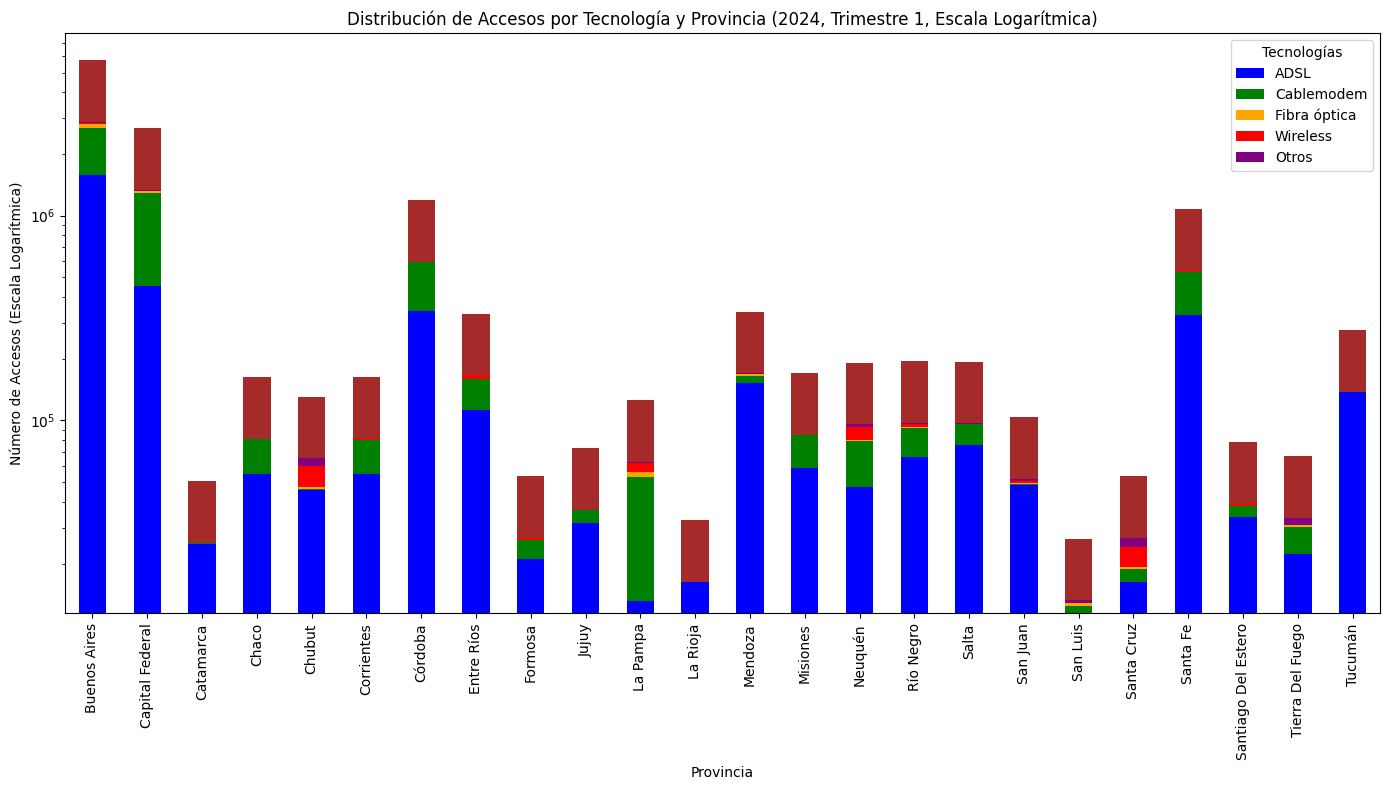

In [1484]:
# Filtrar los datos para el año 2024 y trimestre 1
acceso_tecnologia_2024_T1 = acceso_tecnologia[(acceso_tecnologia['Año'] == 2015) & (acceso_tecnologia['Trimestre'] == 1)]

# Agrupar por provincia y sumar los valores de cada tecnología
df_agrupado = acceso_tecnologia_2024_T1.groupby('Provincia').sum(numeric_only=True).reset_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Crear un gráfico de barras apiladas con escala logarítmica en el eje Y
df_agrupado.plot(
    x='Provincia',
    kind='bar',
    stacked=True,
    ax=ax,
    color=['blue', 'green', 'orange', 'red', 'purple', 'brown']
)

# Configurar el eje Y como logarítmico
ax.set_yscale('log')

# Agregar título y etiquetas
ax.set_title('Distribución de Accesos por Tecnología y Provincia (2024, Trimestre 1, Escala Logarítmica)')
ax.set_xlabel('Provincia')
ax.set_ylabel('Número de Accesos (Escala Logarítmica)')
plt.xticks(rotation=90)

# Mostrar leyenda y gráfico
plt.legend(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], title="Tecnologías")
plt.tight_layout()
plt.show()


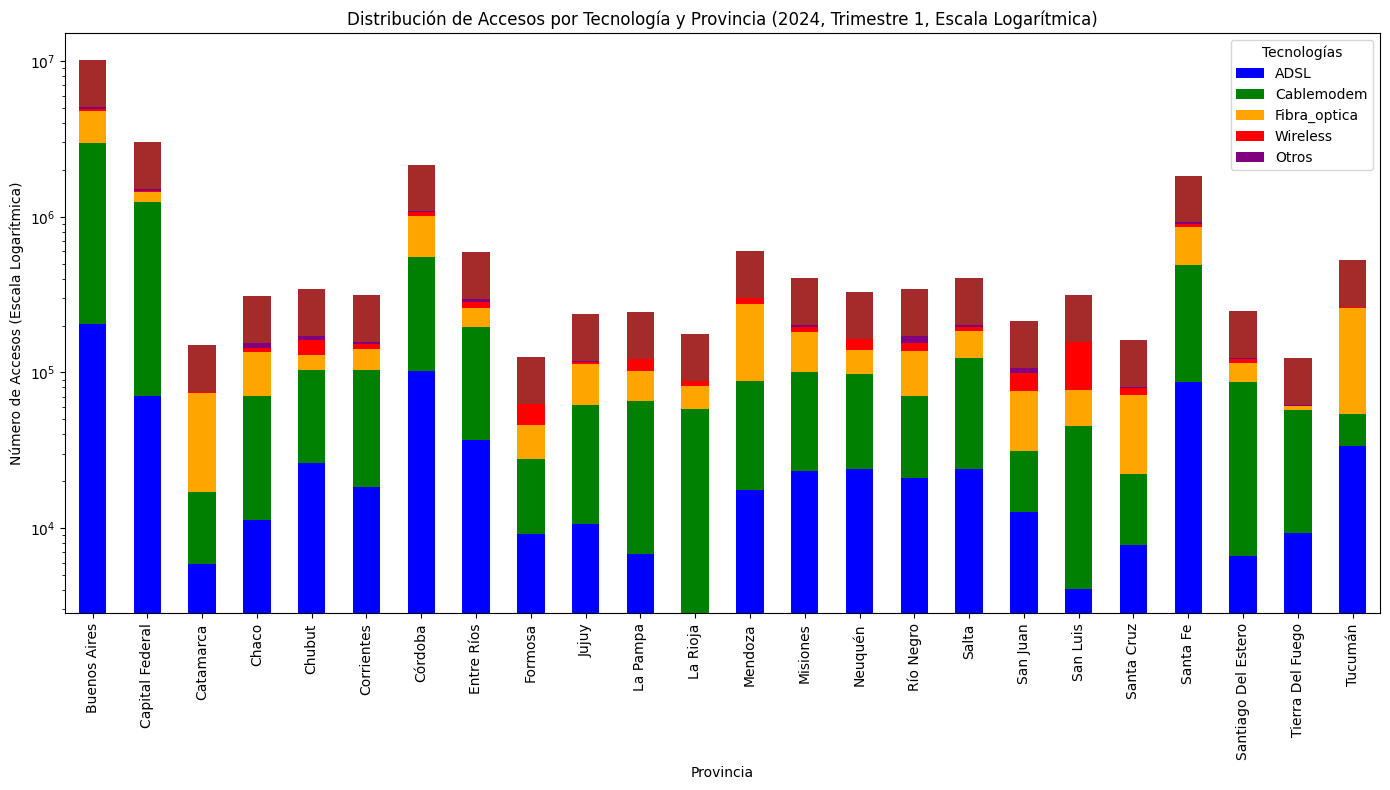

In [1485]:
# Filtrar los datos para el año 2024 y trimestre 1
acceso_tecnologia_2024_T1 = acceso_tecnologia[(acceso_tecnologia['Año'] == 2024) & (acceso_tecnologia['Trimestre'] == 1)]

# Agrupar por provincia y sumar los valores de cada tecnología
df_agrupado = acceso_tecnologia_2024_T1.groupby('Provincia').sum(numeric_only=True).reset_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Crear un gráfico de barras apiladas con escala logarítmica en el eje Y
df_agrupado.plot(
    x='Provincia',
    kind='bar',
    stacked=True,
    ax=ax,
    color=['blue', 'green', 'orange', 'red', 'purple', 'brown']
)

# Configurar el eje Y como logarítmico
ax.set_yscale('log')

# Agregar título y etiquetas
ax.set_title('Distribución de Accesos por Tecnología y Provincia (2024, Trimestre 1, Escala Logarítmica)')
ax.set_xlabel('Provincia')
ax.set_ylabel('Número de Accesos (Escala Logarítmica)')
plt.xticks(rotation=90)

# Mostrar leyenda y gráfico
plt.legend(['ADSL', 'Cablemodem', 'Fibra_optica', 'Wireless', 'Otros'], title="Tecnologías")
plt.tight_layout()
plt.show()


In [1486]:
print(acceso_tecnologia['Año'].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


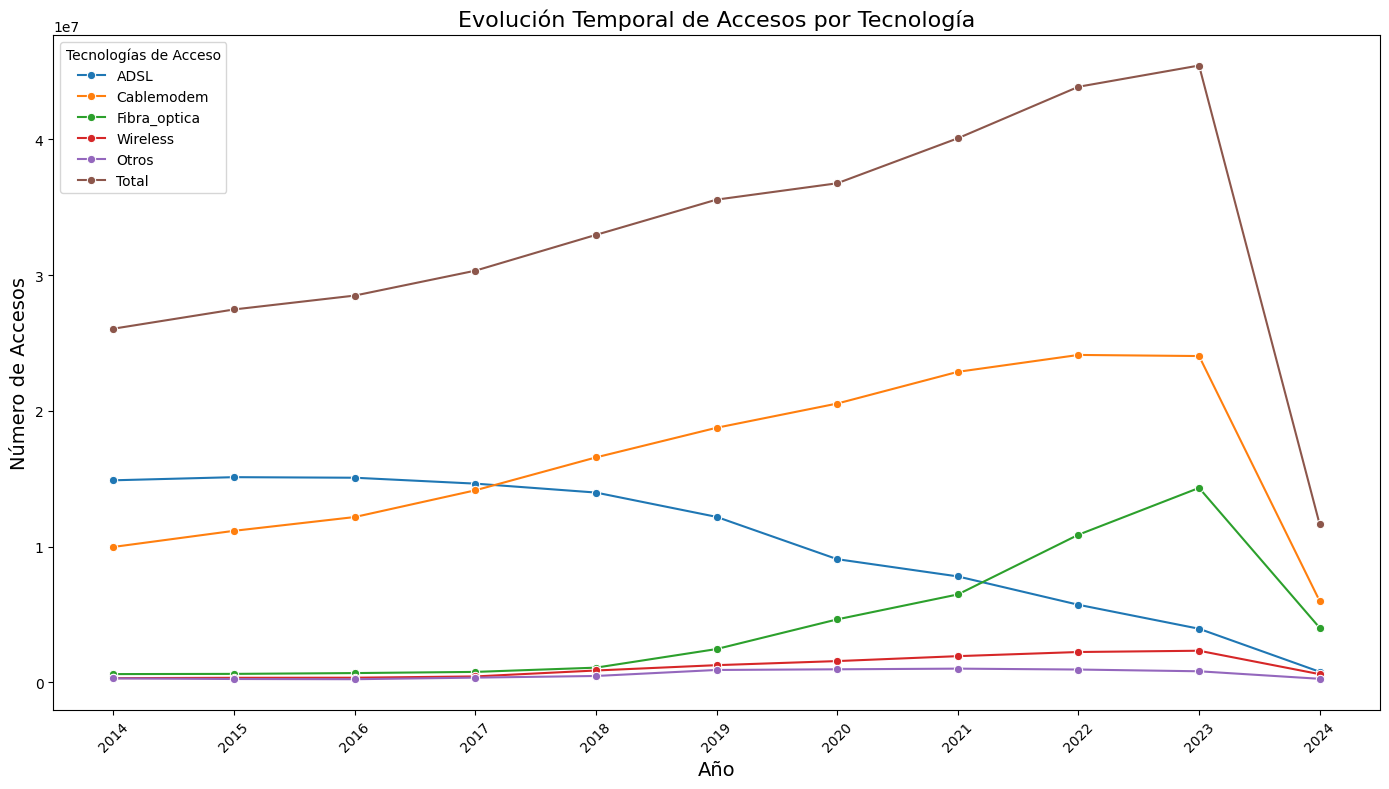

In [1487]:
# Asegurarse de que la columna 'Año' esté en formato numérico
acceso_tecnologia['Año'] = pd.to_numeric(acceso_tecnologia['Año'], errors='coerce')

# Agrupar los datos por Año y sumar los accesos por tecnología
df_agrupado = acceso_tecnologia.groupby('Año').sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

# Crear un gráfico de líneas para cada tecnología
sns.lineplot(data=df_agrupado, x='Año', y='ADSL', label='ADSL', marker='o', ax=ax)
sns.lineplot(data=df_agrupado, x='Año', y='Cablemodem', label='Cablemodem', marker='o', ax=ax)
sns.lineplot(data=df_agrupado, x='Año', y='Fibra_optica', label='Fibra_optica', marker='o', ax=ax)
sns.lineplot(data=df_agrupado, x='Año', y='Wireless', label='Wireless', marker='o', ax=ax)
sns.lineplot(data=df_agrupado, x='Año', y='Otros', label='Otros', marker='o', ax=ax)
sns.lineplot(data=df_agrupado, x='Año', y='Total', label='Total', marker='o', ax=ax)

# Ajustar los ticks del eje X para que muestren cada año
ax.set_xticks(df_agrupado['Año'])
ax.set_xticklabels(df_agrupado['Año'], rotation=45)  # Rotar etiquetas si es necesario

# Agregar título y etiquetas
ax.set_title('Evolución Temporal de Accesos por Tecnología', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Número de Accesos', fontsize=14)

# Mostrar leyenda y gráfico
plt.legend(title="Tecnologías de Acceso")
plt.tight_layout()
plt.show()


## Explicación del gráfico de arriba:
Este gráfico muestra la evolución temporal de los accesos a Internet por diferentes tecnologías desde el año 2010 hasta 2024. 

Una observacion que me sorprende, es la bajada en el ultimo año de el acceso a las diferentes tecnologias.


### Realizo una tabla que refleja la tasa de cancelacion a el servicio internet tambien conocido como churn rate

In [1488]:
# Ordeno el DataFrame por Provincia, Año y Trimestre para asegurar que la diferencia se calcule correctamente.
acceso_tecnologia = acceso_tecnologia.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Calculo la diferencia en el total de usuarios entre trimestres para cada provincia.
tasa_cancelacion = acceso_tecnologia.copy()
tasa_cancelacion['caida_Total'] = acceso_tecnologia.groupby('Provincia')['Total'].diff()

# Mantengo solo las bajas, convirtiendo las diferencias negativas en valores positivos.
tasa_cancelacion['caida_Total'] = tasa_cancelacion['caida_Total'].apply(lambda x: -x if x < 0 else 0)

# Calculo la tasa de cancelación basada en las bajas, como porcentaje del total del trimestre anterior.
tasa_cancelacion['tasa_cancelacion'] = \
    tasa_cancelacion['caida_Total'] / acceso_tecnologia.groupby('Provincia')['Total'].shift(1) * 100

# Elimino las filas que contienen NaN, típicamente en la primera fila de cada grupo.
tasa_cancelacion = tasa_cancelacion.dropna().reset_index(drop=True)

# Mantengo solo las columnas: Provincia, Año, Trimestre, Total, caida_Total, y tasa_cancelacion.
tasa_cancelacion = tasa_cancelacion[['Provincia', 'Año', 'Trimestre', 'Total', 'caida_Total', 'tasa_cancelacion']]

# Muestro el resultado final.
print(tasa_cancelacion)


        Provincia   Año Trimestre      Total  caida_Total  tasa_cancelacion
0    Buenos Aires  2014         2  2764546.0          0.0          0.000000
1    Buenos Aires  2014         3  2849565.0          0.0          0.000000
2    Buenos Aires  2014         4  2816407.0      33158.0          1.163616
3    Buenos Aires  2015         1  2861842.0          0.0          0.000000
4    Buenos Aires  2015         2  2883790.0          0.0          0.000000
..            ...   ...       ...        ...          ...               ...
955       Tucumán  2023         1   261100.0       2322.0          0.881475
956       Tucumán  2023         2   263602.0          0.0          0.000000
957       Tucumán  2023         3   266557.0          0.0          0.000000
958       Tucumán  2023         4   266335.0        222.0          0.083284
959       Tucumán  2024         1   264595.0       1740.0          0.653313

[960 rows x 6 columns]


### Explicación:
- Total: Número total de accesos en un trimestre.
- Accesos Diferencia: Cambio en el número de accesos entre trimestres consecutivos.
- Clientes Cancelados: Se estima como la disminución de accesos. Si la diferencia es positiva, no se considera cancelación.
- Churn Rate: Estimación de la tasa de cancelación basada en la disminución de accesos.

***Seguiremos con***

## acceso_velocidad


In [1489]:
acceso_velocidad

,Año,Trimestre,Provincia,Total,Muy Baja velocidad (Hasta 1 Mbps),Baja velocidad (De 1 a 10 Mbps),Velocidad media (De 10 a 20 Mbps),Alta velocidad (De 20 a 30 Mbps),Muy alta velocidad (Mas de 30 Mbps)
0,2024,1,Buenos Aires,5044557.0,48512.0,454410.0,241778.0,106418.0,4068292.0
1,2024,1,Capital Federal,1504711.0,5934.0,81168.0,37369.0,5957.0,1374283.0
2,2024,1,Catamarca,74933.0,247.0,6296.0,4204.0,1822.0,62294.0
3,2024,1,Chaco,155543.0,652.0,23200.0,5533.0,5718.0,116624.0
4,2024,1,Chubut,170676.0,1194.0,75713.0,23024.0,20261.0,33844.0
...,...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,26760.0,1786.0,24973.0,1.0,0.0,0.0
980,2014,1,Santa Fe,506013.0,132924.0,365553.0,6845.0,23.0,668.0
981,2014,1,Santiago Del Estero,37113.0,11765.0,25239.0,109.0,0.0,0.0
982,2014,1,Tierra Del Fuego,31527.0,619.0,30908.0,0.0,0.0,0.0


## Explicación de los siguientes 2 gráficos:
***Estos gráficos muestran la distribución de los accesos a internet por velocidad en diferentes provincias. Cada barra representa una provincia.***

#### Primero veremos en 2015, luego 2019 y luego 2024  (todos en el primer trimestre) para analizar como cambio con el tiempo

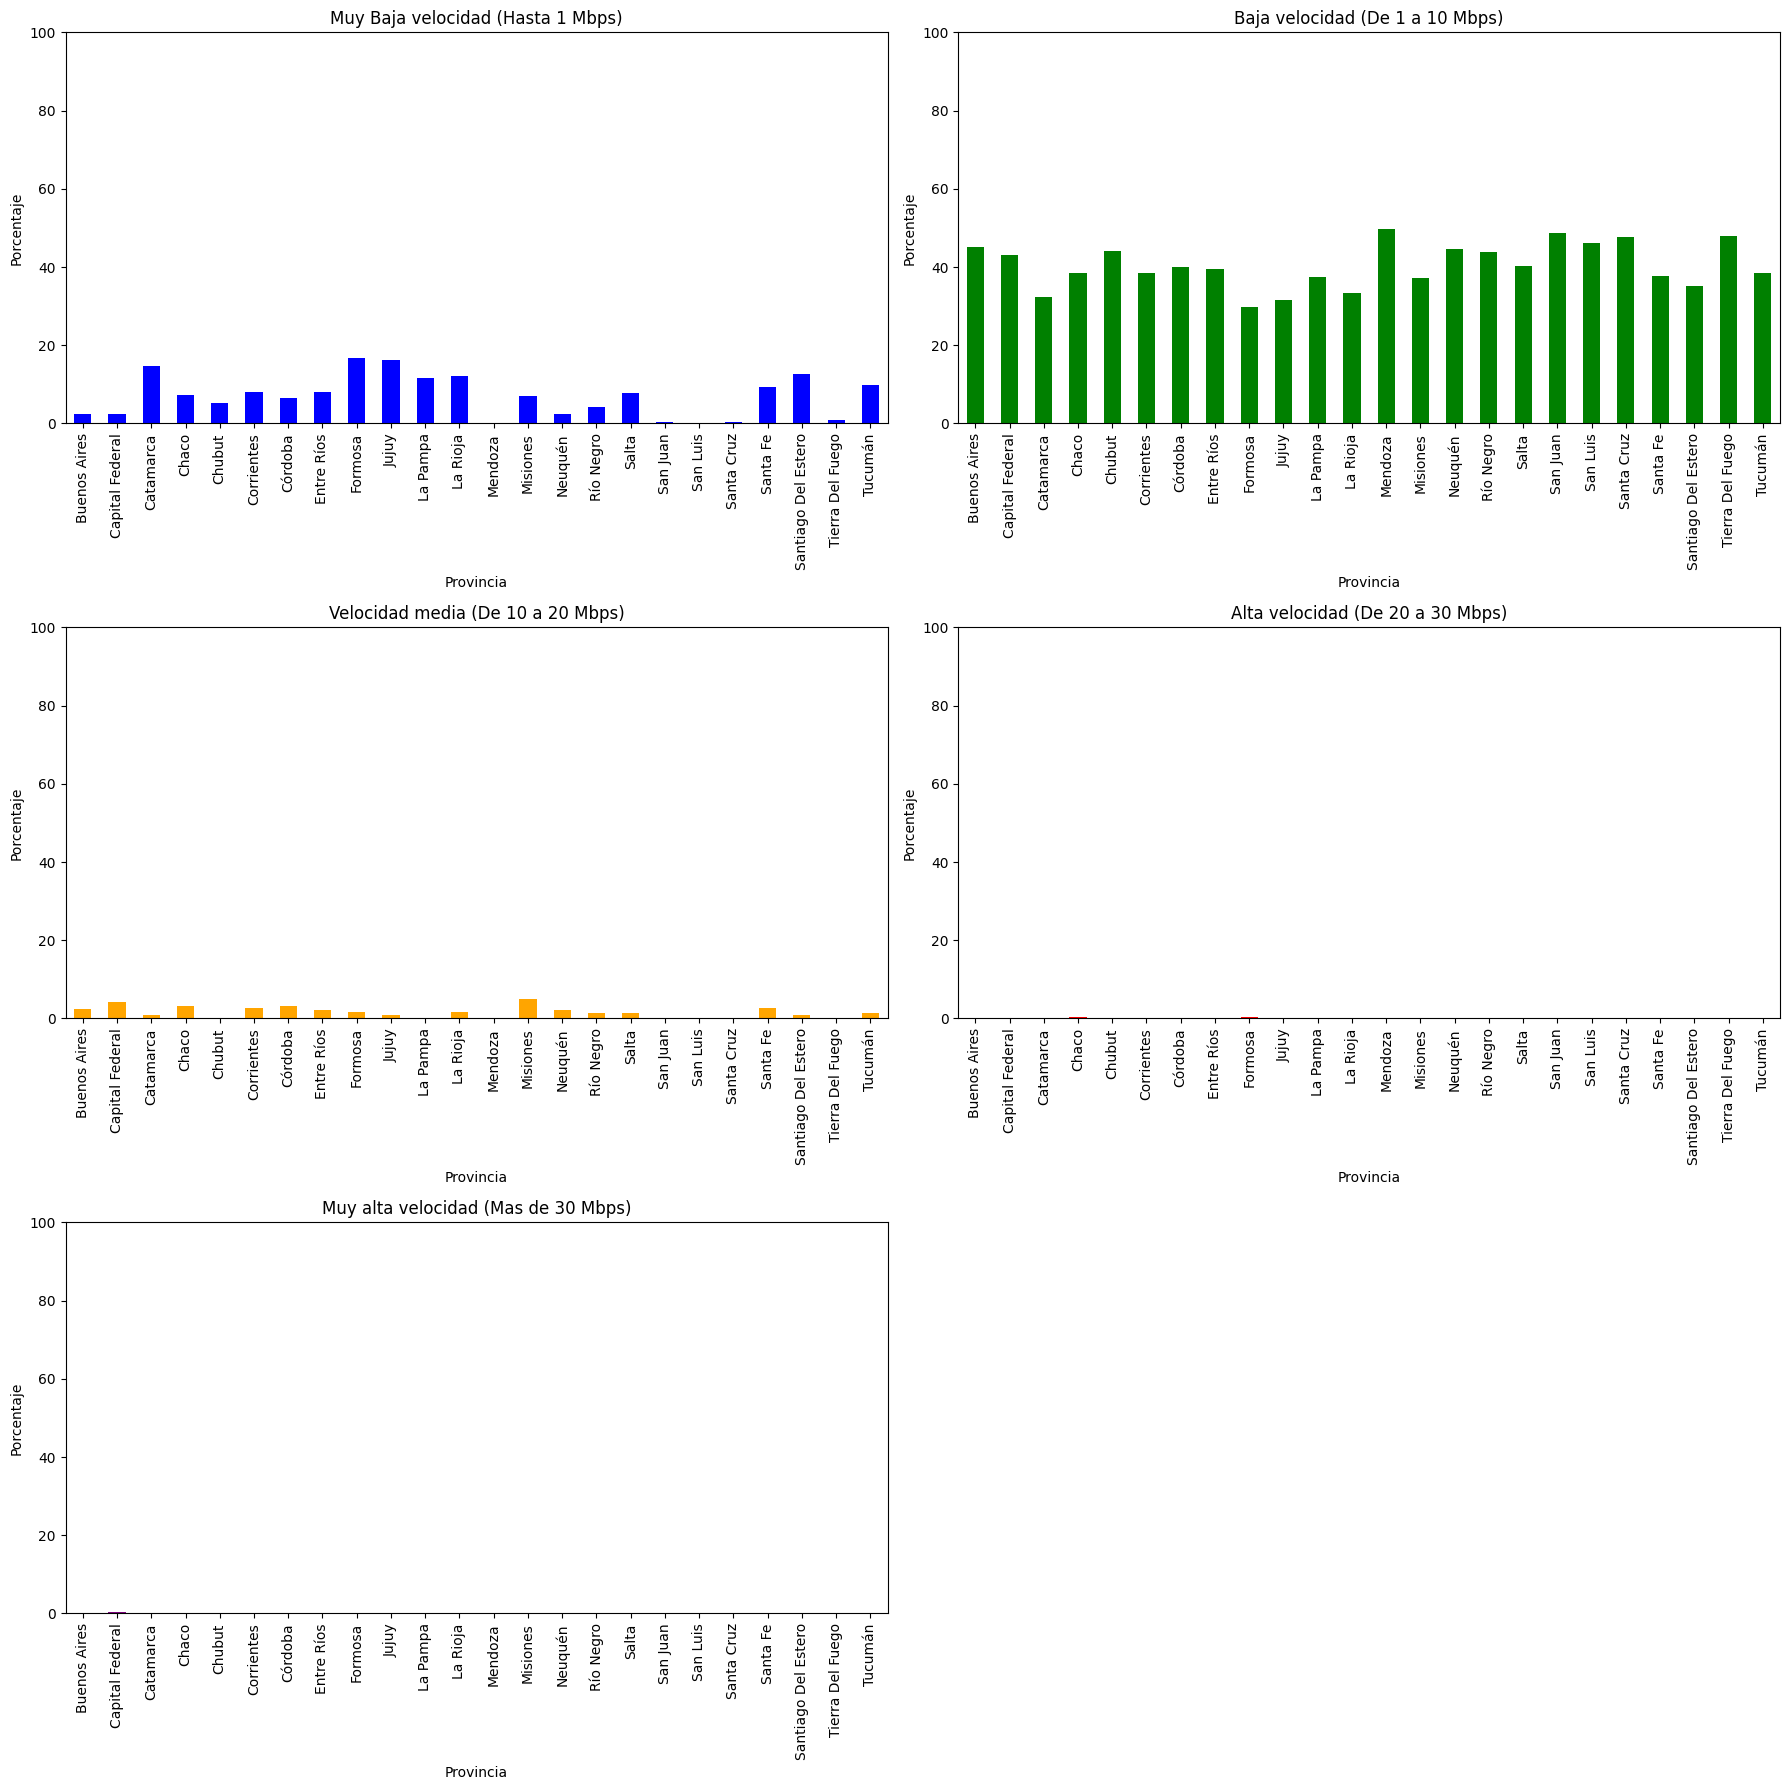

In [1490]:
# Filtrar los datos para el año 2024 y el primer trimestre
acceso_velocidad_2024_T1 = acceso_velocidad[(acceso_velocidad['Año'] == 2015) & (acceso_velocidad['Trimestre'] == 1)]

# Agrupar los datos por provincia y sumar los valores para cada categoría de velocidad
df_grouped = acceso_velocidad_2024_T1.groupby('Provincia').sum().reset_index()

# Establecer la provincia como índice para facilitar el cálculo de proporciones
proporciones_por_provincia = df_grouped.set_index('Provincia')

# Calcular los porcentajes de cada categoría respecto al total por provincia
proporciones_por_provincia_pct = proporciones_por_provincia.div(proporciones_por_provincia.sum(axis=1), axis=0) * 100

# Generar gráficos individuales para cada categoría de velocidad por provincia
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Definir las categorías de velocidad
categorias = ['Muy Baja velocidad (Hasta 1 Mbps)', 'Baja velocidad (De 1 a 10 Mbps)',
            'Velocidad media (De 10 a 20 Mbps)', 'Alta velocidad (De 20 a 30 Mbps)',
            'Muy alta velocidad (Mas de 30 Mbps)']

# Definir colores personalizados para cada categoría
colores = ['blue', 'green', 'orange', 'red', 'purple']

# Graficar cada categoría en un subgráfico
for i, categoria in enumerate(categorias):
    ax = axes[i//2, i%2]
    proporciones_por_provincia_pct[categoria].plot(kind='bar', ax=ax, color=colores[i])
    ax.set_title(categoria)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Porcentaje')
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=90)

# Eliminar el gráfico sobrante
fig.delaxes(axes[2, 1])

# Ajustar el layout
plt.tight_layout()
plt.show()


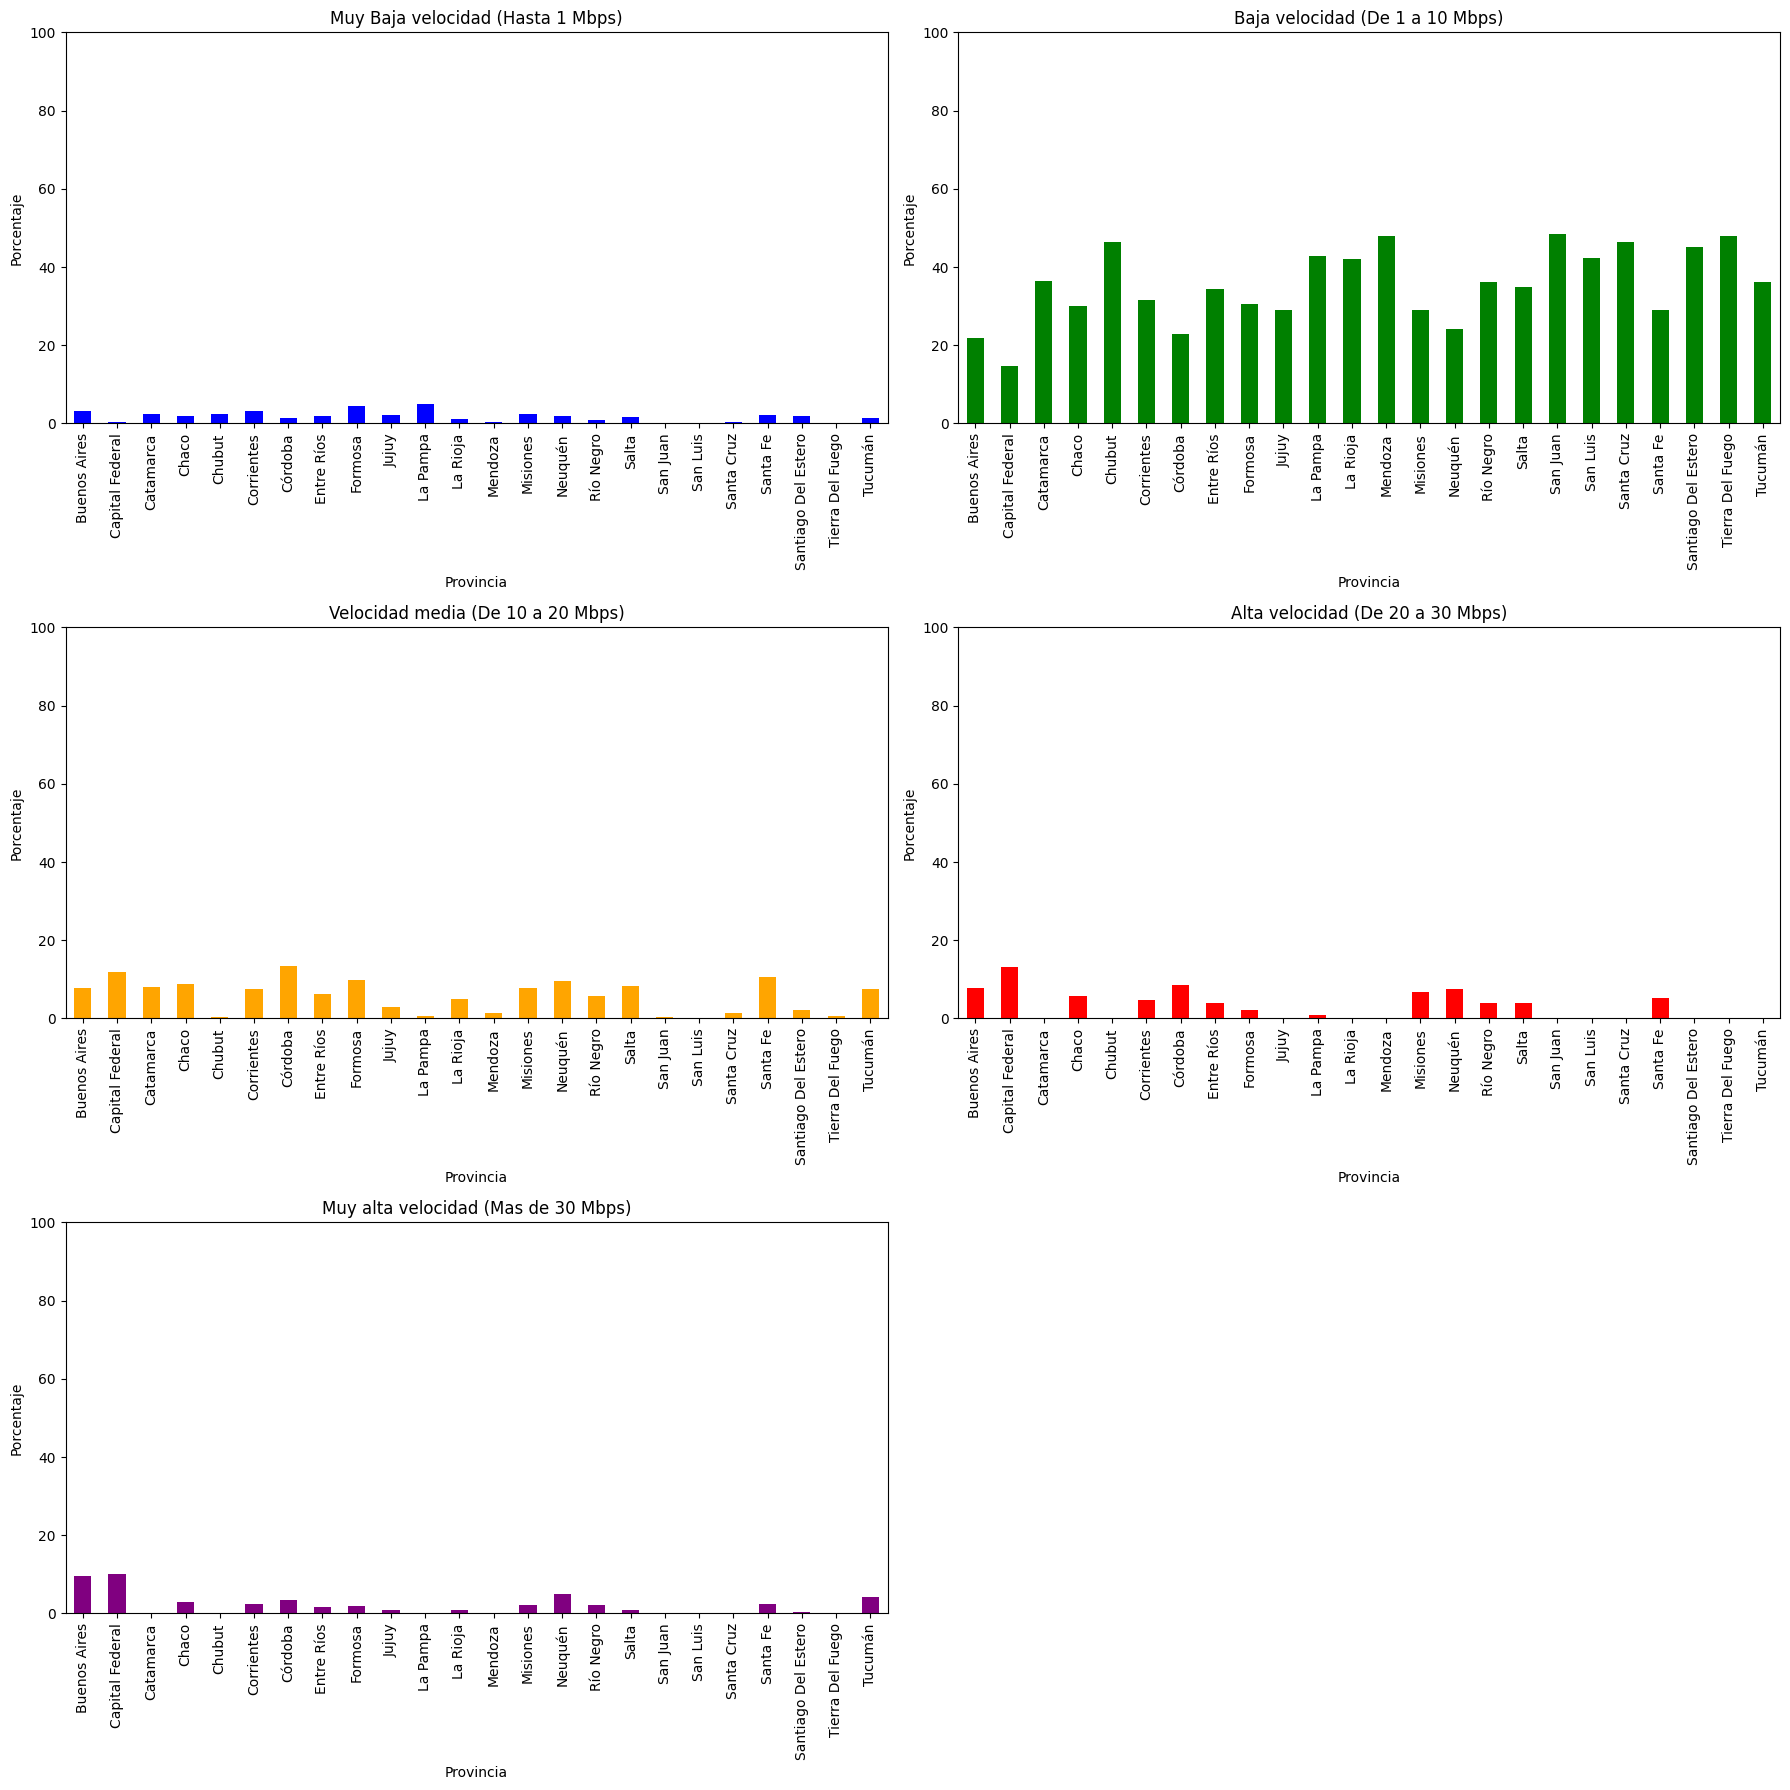

In [1491]:
# Filtrar los datos para el año 2024 y el primer trimestre
acceso_velocidad_2024_T1 = acceso_velocidad[(acceso_velocidad['Año'] == 2019) & (acceso_velocidad['Trimestre'] == 1)]

# Agrupar los datos por provincia y sumar los valores para cada categoría de velocidad
df_grouped = acceso_velocidad_2024_T1.groupby('Provincia').sum().reset_index()

# Establecer la provincia como índice para facilitar el cálculo de proporciones
proporciones_por_provincia = df_grouped.set_index('Provincia')

# Calcular los porcentajes de cada categoría respecto al total por provincia
proporciones_por_provincia_pct = proporciones_por_provincia.div(proporciones_por_provincia.sum(axis=1), axis=0) * 100

# Generar gráficos individuales para cada categoría de velocidad por provincia
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Definir las categorías de velocidad
categorias = ['Muy Baja velocidad (Hasta 1 Mbps)', 'Baja velocidad (De 1 a 10 Mbps)',
            'Velocidad media (De 10 a 20 Mbps)', 'Alta velocidad (De 20 a 30 Mbps)',
            'Muy alta velocidad (Mas de 30 Mbps)']

# Definir colores personalizados para cada categoría
colores = ['blue', 'green', 'orange', 'red', 'purple']

# Graficar cada categoría en un subgráfico
for i, categoria in enumerate(categorias):
    ax = axes[i//2, i%2]
    proporciones_por_provincia_pct[categoria].plot(kind='bar', ax=ax, color=colores[i])
    ax.set_title(categoria)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Porcentaje')
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=90)

# Eliminar el gráfico sobrante
fig.delaxes(axes[2, 1])

# Ajustar el layout
plt.tight_layout()
plt.show()


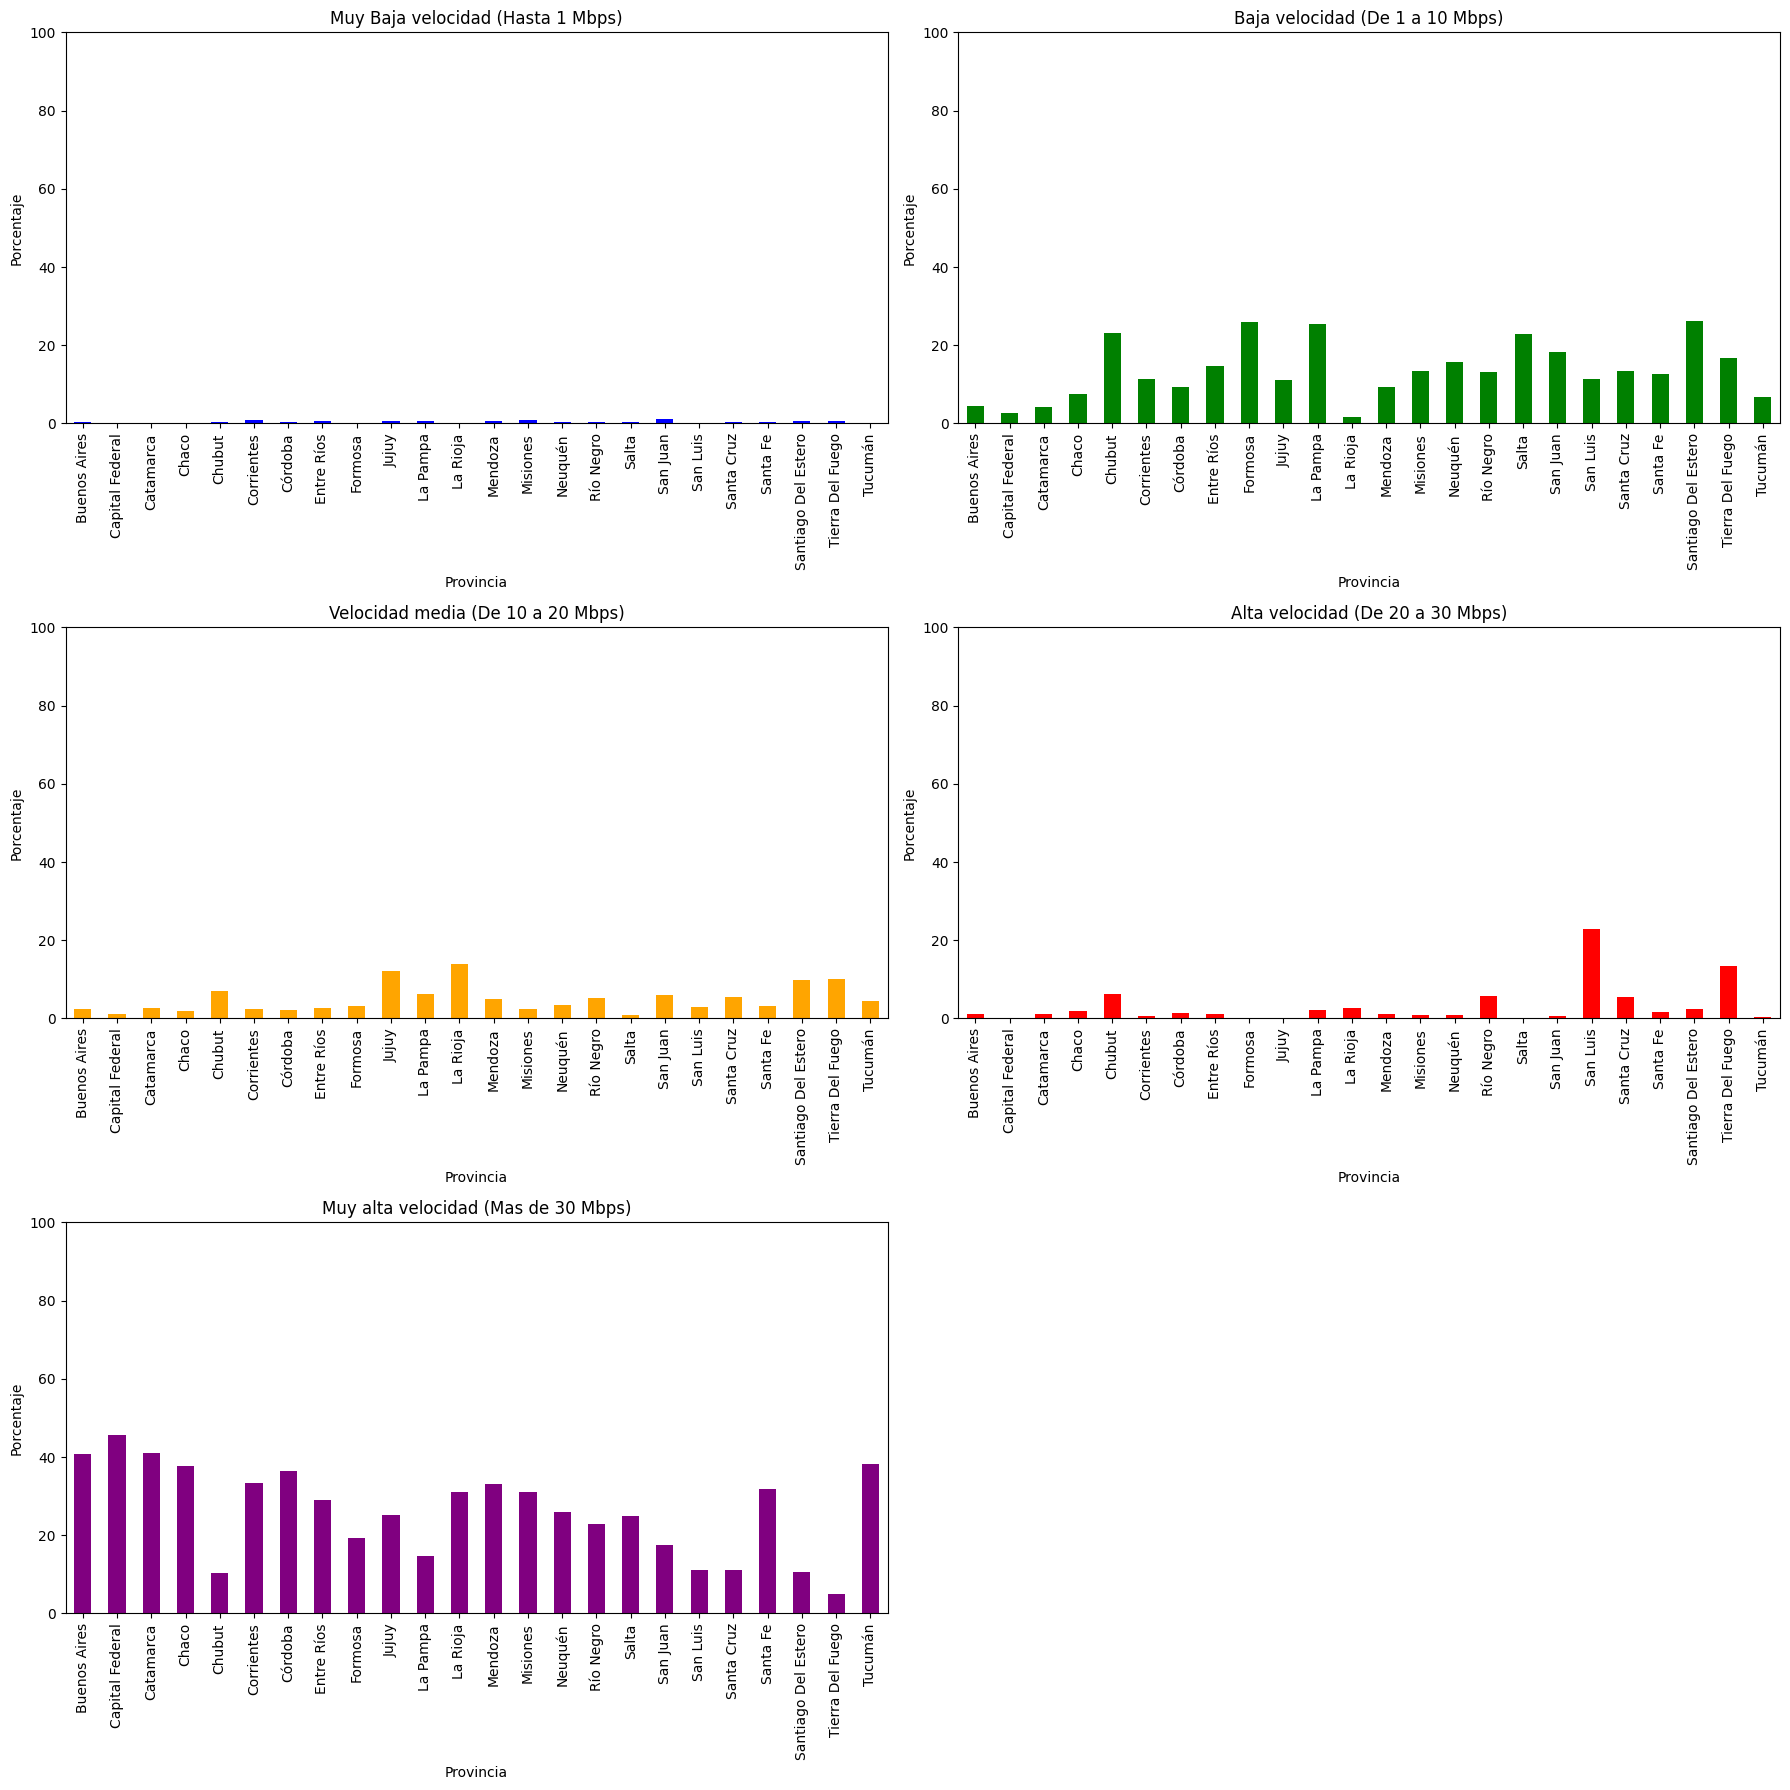

In [1492]:
# Filtrar los datos para el año 2024 y el primer trimestre
acceso_velocidad_2024_T1 = acceso_velocidad[(acceso_velocidad['Año'] == 2024) & (acceso_velocidad['Trimestre'] == 1)]

# Agrupar los datos por provincia y sumar los valores para cada categoría de velocidad
df_grouped = acceso_velocidad_2024_T1.groupby('Provincia').sum().reset_index()

# Establecer la provincia como índice para facilitar el cálculo de proporciones
proporciones_por_provincia = df_grouped.set_index('Provincia')

# Calcular los porcentajes de cada categoría respecto al total por provincia
proporciones_por_provincia_pct = proporciones_por_provincia.div(proporciones_por_provincia.sum(axis=1), axis=0) * 100

# Generar gráficos individuales para cada categoría de velocidad por provincia
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Definir las categorías de velocidad
categorias = ['Muy Baja velocidad (Hasta 1 Mbps)', 'Baja velocidad (De 1 a 10 Mbps)',
            'Velocidad media (De 10 a 20 Mbps)', 'Alta velocidad (De 20 a 30 Mbps)',
            'Muy alta velocidad (Mas de 30 Mbps)']

# Definir colores personalizados para cada categoría
colores = ['blue', 'green', 'orange', 'red', 'purple']

# Graficar cada categoría en un subgráfico
for i, categoria in enumerate(categorias):
    ax = axes[i//2, i%2]
    proporciones_por_provincia_pct[categoria].plot(kind='bar', ax=ax, color=colores[i])
    ax.set_title(categoria)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Porcentaje')
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=90)

# Eliminar el gráfico sobrante
fig.delaxes(axes[2, 1])

# Ajustar el layout
plt.tight_layout()
plt.show()


## Podemos ver como en el año 2015 la velocidad "muy alta" era nula, en el 2019 todavia era escasa, pero en 2024 es por lejos la mas utilizada. Realicemos otro grafico para ver como fue este crecimiento y como afecto a las otras velocidades.

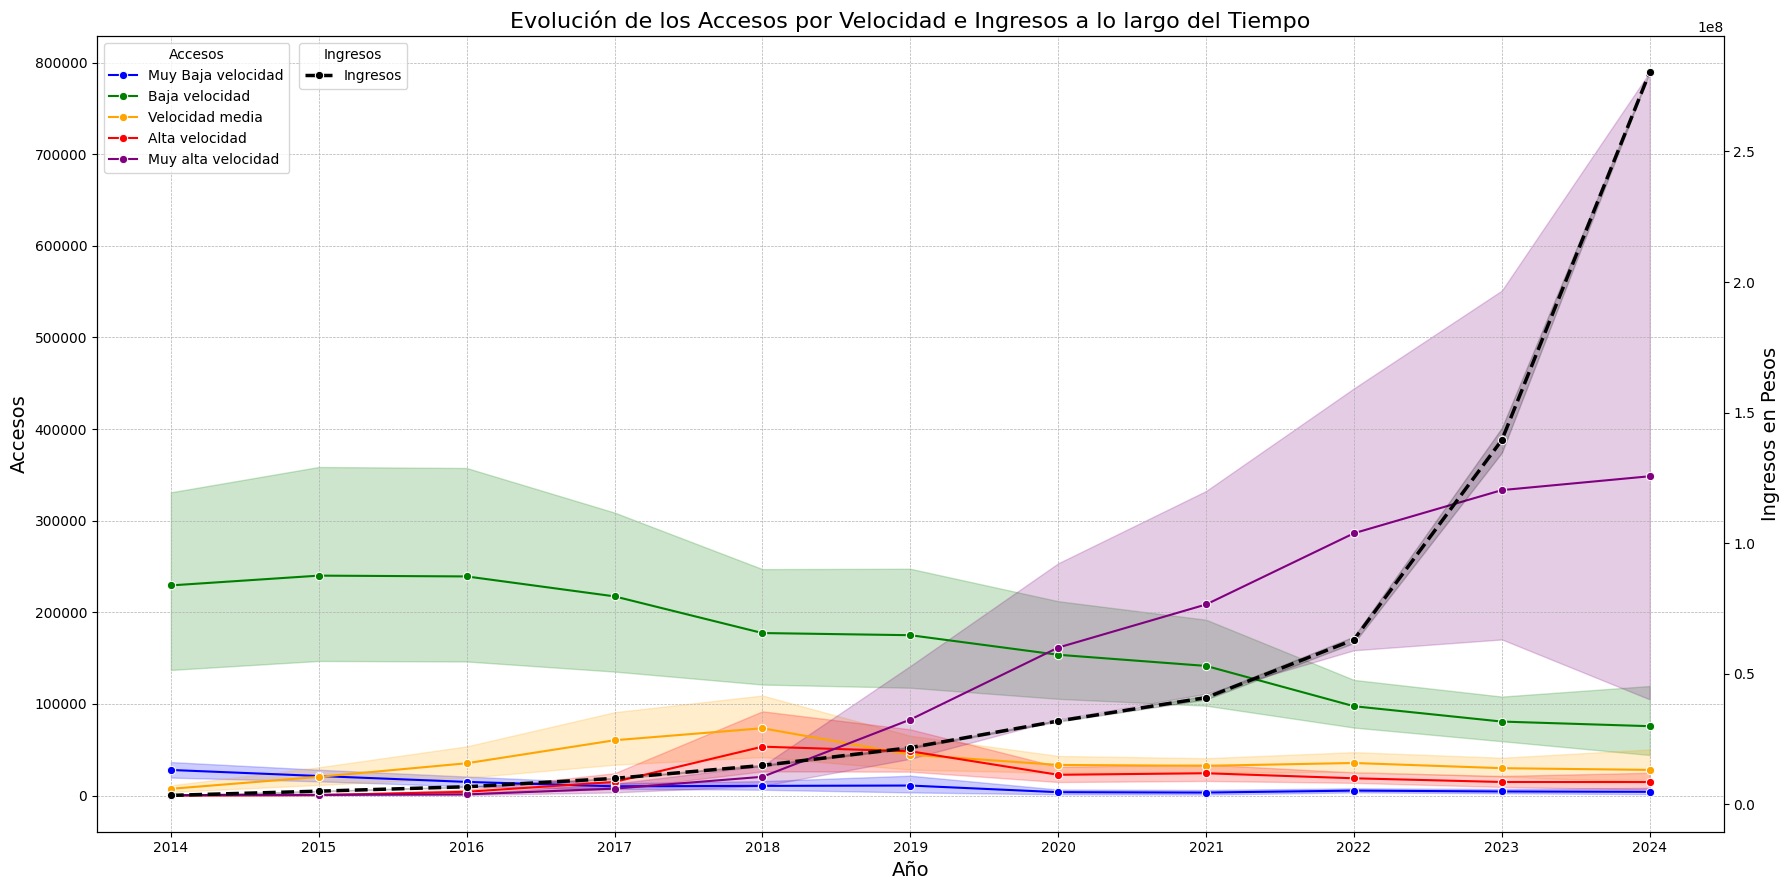

In [1493]:
# Combinamos los Df para analizar los datos desde ahi
grafico1 = pd.merge(acceso_velocidad, ingresos, on=['Año', 'Trimestre'], how='inner')

# Ordenar el DataFrame por la columna Año en orden ascendente para que los años mas actuales esten a la derecha
grafico1 = grafico1.sort_values('Año')

# Crear una columna de solo años para el eje X
grafico1['Año'] = grafico1['Año'].astype(str)

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(18, 9))

# Graficar las líneas para cada rango de velocidad en ax1
sns.lineplot(
    data=grafico1,
    x='Año',
    y='Muy Baja velocidad (Hasta 1 Mbps)',
    label='Muy Baja velocidad',
    marker='o',
    color='blue',
    ax=ax1
)
sns.lineplot(
    data=grafico1,
    x='Año',
    y='Baja velocidad (De 1 a 10 Mbps)',
    label='Baja velocidad',
    marker='o',
    color='green',
    ax=ax1
)
sns.lineplot(
    data=grafico1,
    x='Año',
    y='Velocidad media (De 10 a 20 Mbps)',
    label='Velocidad media',
    marker='o',
    color='orange',
    ax=ax1
)
sns.lineplot(
    data=grafico1,
    x='Año',
    y='Alta velocidad (De 20 a 30 Mbps)',
    label='Alta velocidad',
    marker='o',
    color='red',
    ax=ax1
)
sns.lineplot(
    data=grafico1,
    x='Año',
    y='Muy alta velocidad (Mas de 30 Mbps)',
    label='Muy alta velocidad',
    marker='o',
    color='purple',
    ax=ax1
)

# Crear un segundo eje Y para los ingresos
ax2 = ax1.twinx()

# Graficar la línea de ingresos en ax2 con un estilo diferente
sns.lineplot(
    data=grafico1,
    x='Año',
    y='Ingresos en Pesos',
    label='Ingresos',
    marker='o',
    color='black',
    linestyle='--',  # Estilo de línea discontinua
    linewidth=2.5,   # Aumentar el grosor de la línea
    ax=ax2
)

# Configurar títulos y etiquetas
ax1.set_title('Evolución de los Accesos por Velocidad e Ingresos a lo largo del Tiempo', fontsize=16)
ax1.set_xlabel('Año', fontsize=14)
ax1.set_ylabel('Accesos', fontsize=14)
ax2.set_ylabel('Ingresos en Pesos', fontsize=14)

# Ajustar las leyendas
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1, labels1, loc='upper left', title="Accesos", bbox_to_anchor=(0, 1))
ax2.legend(handles2, labels2, loc='upper left', title="Ingresos", bbox_to_anchor=(0.12, 1))

# Añadir cuadrícula al gráfico principal
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar los márgenes para que todo el contenido sea visible
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Explicación del gráfico de arriba:
#### Ejes:
- Eje X (horizontal): Muestra los años desde 2014 hasta 2024.
- Eje Y izquierdo: Muestra el número de accesos para cada categoría de velocidad.
- Eje Y derecho: Representa los ingresos en pesos.

#### Líneas de colores:
- Muy Baja velocidad (Hasta 1 Mbps) (color azul): Representa la cantidad de accesos a Internet a velocidades muy bajas.
- Baja velocidad (De 1 a 10 Mbps) (color verde): Muestra la cantidad de accesos a velocidades bajas.
- Velocidad media (De 10 a 20 Mbps) (color naranja): Muestra la cantidad de accesos a velocidades medias.
- Alta velocidad (De 20 a 30 Mbps) (color roja): Muestra la cantidad de accesos a velocidades altas.
- Muy alta velocidad (Más de 30 Mbps) (color púrpura): Representa los accesos a velocidades muy altas.
- Ingresos (color negro, línea discontinua): Muestra la evolución de los ingresos a lo largo del tiempo.

#### Sombras alrededor de las líneas:
Las bandas de colores que rodean cada línea son los intervalos de confianza. Estos intervalos indican la variabilidad o incertidumbre en los datos de cada categoría.
Cuanto más ancha es la banda, mayor es la incertidumbre o variabilidad en los datos de esa categoría.


### Se logra ver un gran aumento en el uso de velocidades mayores a 30 Mbps, que en 2018 comenzo a crecer exponencialmente, podemos ver que este crecimiento significativo causo la caida de el uso de las otras velocidades, y se convirtio en el año 2020 en la velocidad mas utilizada.

## Ingresos

In [1494]:
ingresos.head()

,Año,Trimestre,Ingresos en Pesos
0,2024,1,280419124
1,2023,4,167376015
2,2023,3,133106593
3,2023,2,118060280
4,2033,1,104134993


### Este código calcula una **estimación** de los ingresos para cada tecnología de acceso basándose en la proporción de usuarios, y luego crea un gráfico de barras para visualizarlo (KPI a presentar).

Logra estimar que el responsable de la mayor parte de los ingresos es mediante Cablemodem mientras que la fibra optica, wirless y otras tecnologias entre las tres no llegan a abarcar lo mismo que ADSL  .

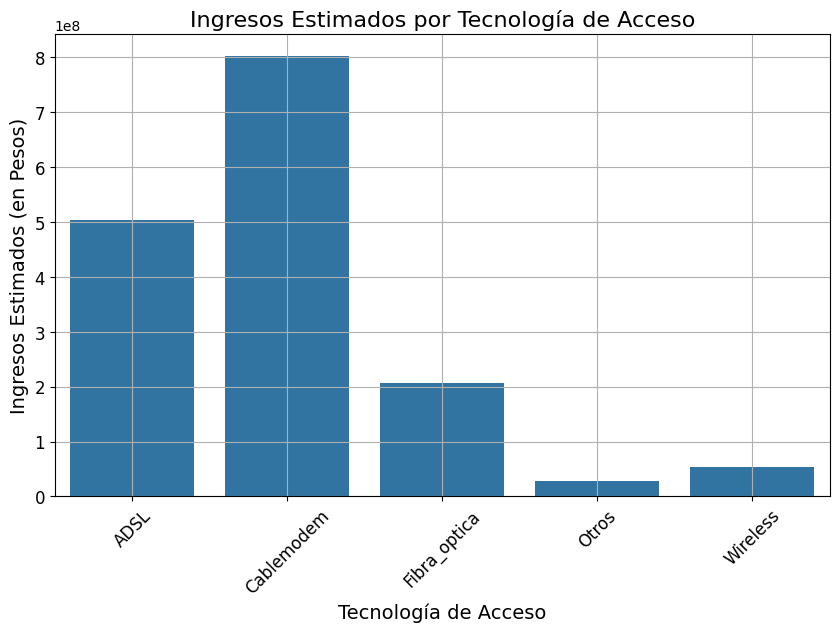

In [1495]:
# Convertir los datos de tecnología en formato largo (long format)
acceso_tecnologia_long = acceso_tecnologia.melt(id_vars=['Año', 'Trimestre', 'Provincia'], 
                                                value_vars=['ADSL', 'Cablemodem', 'Fibra_optica', 'Wireless', 'Otros'],
                                                var_name='Tecnologia', value_name='Total_Tecnologia')

# Calcular la proporción de usuarios por tecnología
total_usuarios_tecnologia = acceso_tecnologia_long.groupby('Tecnologia')['Total_Tecnologia'].sum()

# Calcular el total de ingresos
total_ingresos = ingresos['Ingresos en Pesos'].sum()

# Asignar la proporción de ingresos a cada tecnología basada en el total de usuarios
ingresos_por_tecnologia = total_usuarios_tecnologia / total_usuarios_tecnologia.sum() * total_ingresos

# Crear el gráfico de barras para ingresos por tecnología
plt.figure(figsize=(10, 6))
sns.barplot(x=ingresos_por_tecnologia.index, y=ingresos_por_tecnologia.values)

# Añadir títulos y etiquetas
plt.title('Ingresos Estimados por Tecnología de Acceso', fontsize=16)
plt.ylabel('Ingresos Estimados (en Pesos)', fontsize=14)
plt.xlabel('Tecnología de Acceso', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Accesos_proporcion ("accesos por cada 100 hogares" importante para el KPI dado)


A continuacion dos gráficos donde podemos ver la evolución del acceso a internet por cada 100 hogares en diferentes provincias de Argentina a lo largo de los años. Cada línea representa una provincia, y al dividir las provincias en dos gráficos, se mejora la claridad, permitiendo comparar cómo ha crecido o disminuido el acceso en cada región.

Vemos casos como el de San Juan que tiene un aumento exponencial en 2018, coincidiendo con el comienzo del auje de la fibra optica. Mientras que por otra parte vemos un aumento continuo y uniforme en Cordoba, no como en Tierra del Fuego donde el acceso fue disparejo e incluso disminuyó en dos grandes periodos

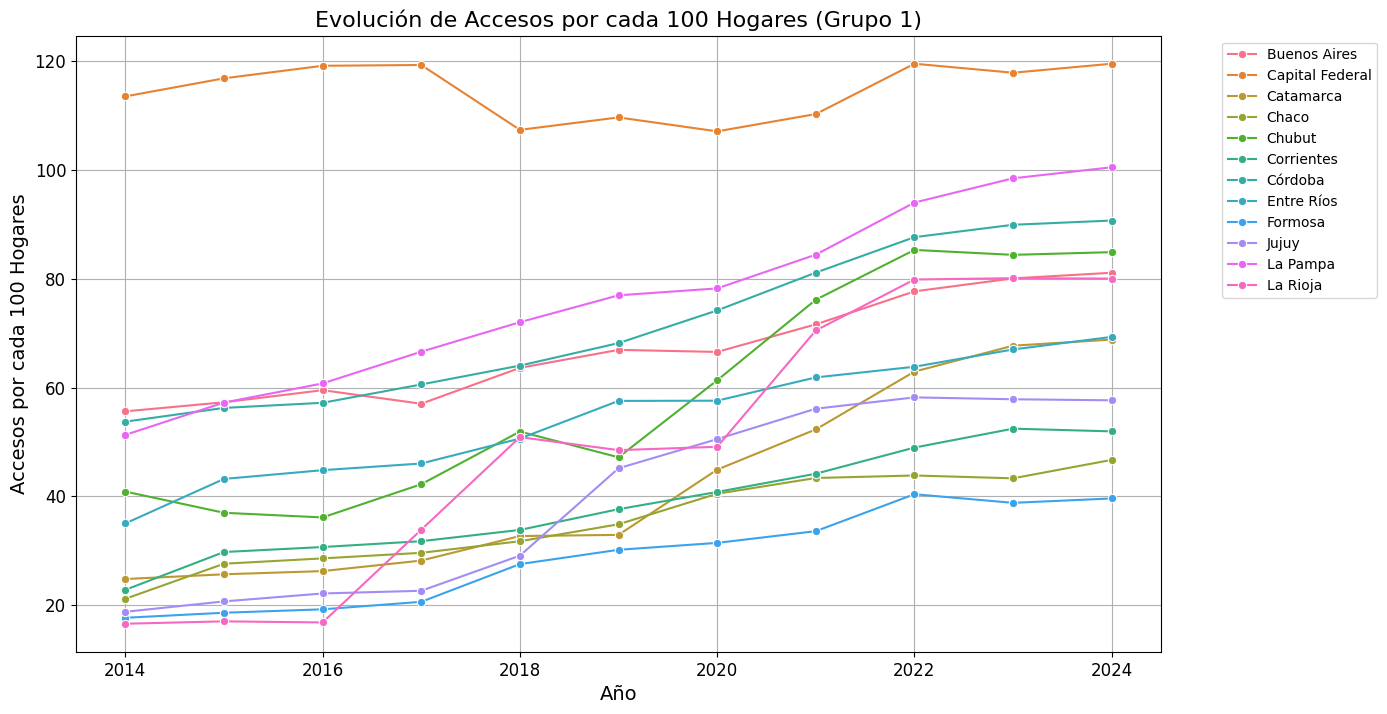

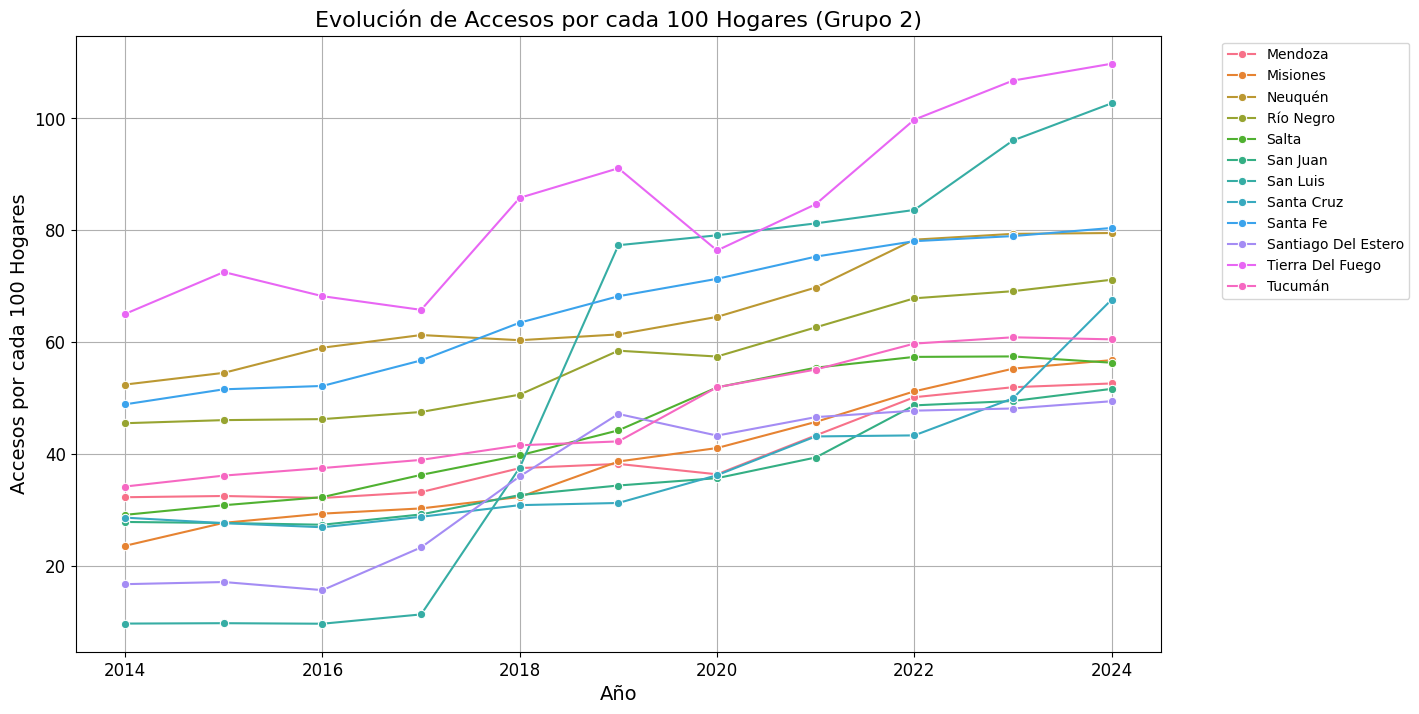

In [1496]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde la hoja de Acceso_Proporcion
acceso_proporcion = pd.read_excel('Internet_transformado.xlsx', sheet_name='Acceso_Proporcion')

# Agrupar los datos por provincia y año, calculando el promedio de accesos por cada 100 hogares
evolucion_acceso_hogares = acceso_proporcion.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].mean().reset_index()

# Dividir las provincias en dos grupos
provincias = evolucion_acceso_hogares['Provincia'].unique()
mitad = len(provincias) // 2
provincias_grupo_1 = provincias[:mitad]
provincias_grupo_2 = provincias[mitad:]

# Filtrar los datos para cada grupo
datos_grupo_1 = evolucion_acceso_hogares[evolucion_acceso_hogares['Provincia'].isin(provincias_grupo_1)]
datos_grupo_2 = evolucion_acceso_hogares[evolucion_acceso_hogares['Provincia'].isin(provincias_grupo_2)]

# Crear el primer gráfico para el grupo 1
plt.figure(figsize=(14, 8))
sns.lineplot(data=datos_grupo_1, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', marker='o')

# Añadir títulos y etiquetas
plt.title('Evolución de Accesos por cada 100 Hogares (Grupo 1)', fontsize=16)
plt.ylabel('Accesos por cada 100 Hogares', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

# Crear el segundo gráfico para el grupo 2
plt.figure(figsize=(14, 8))
sns.lineplot(data=datos_grupo_2, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', marker='o')

# Añadir títulos y etiquetas
plt.title('Evolución de Accesos por cada 100 Hogares (Grupo 2)', fontsize=16)
plt.ylabel('Accesos por cada 100 Hogares', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()


# Conclusiones:

El análisis de la evolución de las tecnologías de acceso a internet en Argentina muestra tanto avances como desafíos en la conectividad del país. Al principio del período estudiado, tecnologías como Cablemodem y Fibra Óptica crecieron de manera constante, lo que mejoró la calidad del internet y aumentó las velocidades disponibles para los usuarios. Por otro lado, la tecnología ADSL, aunque se mantuvo estable por un tiempo, empezó a disminuir, indicando que los usuarios comenzaron a cambiar a opciones más modernas.

Sin embargo, en el último año, se observó un hecho preocupante: una caída en el uso de todas las tecnologías de acceso, incluidas las más avanzadas como Fibra Óptica y Cablemodem. Esta caída podría deberse a factores como problemas económicos, dificultades para expandir la infraestructura o cambios en las necesidades de los usuarios.

Los gráficos que realizamos ayudan a visualizar claramente estas tendencias. Por ejemplo, al analizar el acceso a internet por cada 100 hogares (fundamental para el desarrollo del KPI), se nota que algunas provincias han mejorado mucho, mientras que otras todavía están rezagadas. Esto muestra la necesidad de políticas que ayuden a cerrar la brecha digital entre las diferentes regiones.

Por último, los gráficos sobre la velocidad del internet muestran que, aunque se han hecho avances en la adopción de tecnologías que ofrecen mayores velocidades, aún hay muchas personas que siguen teniendo acceso a velocidades bajas. Esto indica que, además de expandir el acceso, es fundamental mejorar la calidad del servicio para todos.

# **KPIs**


### KPI Dado:

#### 1. Aumento del Acceso a Internet por Hogar
**Descripción:**
Este KPI busca medir el incremento en el acceso a internet por hogar en cada provincia, con el objetivo de aumentar la penetración del servicio. La empresa espera un crecimiento del 2% en el acceso a internet por hogar en el próximo trimestre, lo que indica una expansión del servicio y una mejor cobertura a nivel nacional.

**Fórmula:**

$$
\text{KPI} = \left(\frac{\text{Nuevo acceso} - \text{Acceso actual}}{\text{Acceso actual}}\right) \times 100
$$

Donde:
- "Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

**Objetivo:**
Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, por cada 100 hogares en cada provincia.

---
### KPIs Propuestos:

#### 2.KPI Indice de Velocidad Alta
**Descripción:**
Este KPI está enfocado en evaluar la calidad del servicio ofrecido por la empresa en términos de velocidad de conexión. Tambien mayor porcentaje de accesos con velocidades superiores a 30 Mbps indicará una mayor satisfacción del cliente, lo cual es clave para la retención y fidelización. 

**Fórmula para el indice:**
$$
\text{Indice de Velocidad Alta} = \left(\frac{\text{Accesos con Muy Alta Velocidad (>30 Mbps)}}{\text{Total de Accesos}}\right) \times 100
$$

**Fórmula para el KPI**:

$$
\text{KPI Índice de Velocidad Alta} = \left(\frac{\text{Índice de Velocidad Alta Trimestre Actual} - \text{Índice de Velocidad Alta Trimestre Anterior}}{\text{Índice de Velocidad Alta Trimestre Anterior}}\right) \times 100
$$

**Objetivo:**
Incrementar en un 5% el porcentaje de accesos con velocidades superiores a 30 Mbps en el próximo trimestre.

---

### 3.KPI: Ingreso Ajustado por Inflación

**Descripción:** Este KPI mide los ingresos ajustados por la inflación, proporcionando una visión más precisa y realista del desempeño financiero de la empresa a lo largo del tiempo. Al ajustar los ingresos por la inflación, podemos comparar períodos diferentes en términos reales, eliminando la distorsión causada por el aumento de los precios.

**Fórmula para el Ingreso Ajustado por Inflación:**

$$
\text{Ingreso Ajustado por Inflación} = \frac{\text{Ingreso Actual}}{1 + \left(\frac{\text{Inflación Promedio}}{100}\right)}
$$

**Objetivo:** Evaluar la evolución de los ingresos en términos reales, es decir, descontando el efecto de la inflación. Este KPI permite analizar si el crecimiento de los ingresos ha sido suficiente para superar la inflación y, en consecuencia, si la empresa ha logrado mantener o incrementar su poder adquisitivo a lo largo del tiempo.

***Nota: para esto se cargara un .csv de expectativa de inflacion, no se hara con la inflacion real por falta de fuentes***

In [1497]:
# Cargar el archivo de inflación
file_path = 'expectativas-inflacion-a-doce-mes.csv'
inflacion_df = pd.read_csv(file_path)

# Convertir la columna 'indice_tiempo' a formato de fecha
inflacion_df['indice_tiempo'] = pd.to_datetime(inflacion_df['indice_tiempo'])

# Filtrar para eliminar los registros anteriores a 2014 y posteriores a 2014 (lo que deja solo 2014)
inflacion_df = inflacion_df[(inflacion_df['indice_tiempo'].dt.year >= 2014) & (inflacion_df['indice_tiempo'].dt.year <= 2014)]

# Eliminar la columna 'expectativa_inflacion_mediana'
inflacion_df = inflacion_df.drop(columns=['expectativa_inflacion_mediana'])

# Verificar las primeras filas del dataframe modificado
print(inflacion_df.head())


   indice_tiempo  expectativa_inflacion_promedio
89    2014-01-01                       37.597170
90    2014-02-01                       41.318693
91    2014-03-01                       38.635487
92    2014-04-01                       37.539091
93    2014-05-01                       38.566719


In [1498]:
# Cargar el archivo de inflación
file_path = 'expectativas-inflacion-a-doce-mes.csv'
inflacion_df = pd.read_csv(file_path)

# Convertir la columna 'indice_tiempo' a formato de fecha
inflacion_df['indice_tiempo'] = pd.to_datetime(inflacion_df['indice_tiempo'])

# Filtrar para eliminar los registros anteriores a 2014
inflacion_df = inflacion_df[inflacion_df['indice_tiempo'].dt.year >= 2014]

# Renombrar la columna 'expectativa_inflacion_promedio' a 'inflacion'
inflacion_df = inflacion_df.rename(columns={'expectativa_inflacion_promedio': 'inflacion'})

# Crear nuevas columnas de 'Año' y 'Trimestre'
inflacion_df['Año'] = inflacion_df['indice_tiempo'].dt.year
inflacion_df['Trimestre'] = inflacion_df['indice_tiempo'].dt.quarter

# Agrupar por Año y Trimestre y calcular la inflación promedio por trimestre
inflacion_promedio_trimestral = inflacion_df.groupby(['Año', 'Trimestre'])['inflacion'].mean().reset_index()

# Guardar el archivo modificado con la inflación promedio trimestral
inflacion = inflacion_promedio_trimestral

# Verificar las primeras filas del dataframe modificado
print(inflacion_promedio_trimestral.head())


    Año  Trimestre  inflacion
0  2014          1  39.183783
1  2014          2  37.116754
2  2014          3  38.487669
3  2014          4  37.495565
4  2015          1  30.161079


In [1499]:
display(acceso_proporcion)

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2014,1,Buenos Aires,16.692346,54.570073
1,2014,1,Capital Federal,42.655072,112.254123
2,2014,1,Catamarca,6.184615,24.251751
3,2014,1,Chaco,5.553671,20.718539
4,2014,1,Chubut,12.703590,41.235218
...,...,...,...,...,...
979,2024,1,Santa Cruz,20.100000,67.580000
980,2024,1,Santa Fe,25.280000,80.400000
981,2024,1,Santiago Del Estero,12.260000,49.410000
982,2024,1,Tierra Del Fuego,32.540000,109.780000


***Sacamos la columna "Accesos por cada 100 hab" ya que no fue util en el analisis y tampoco lo sera de aqui en adelante***

In [1500]:
acceso_proporcion = acceso_proporcion.drop(columns=['Accesos por cada 100 hab'])

***Guardamos los archivos en un excel y asi exportarlos a Power Bi para realizar un Dashboard analizando los KPI's***

In [1501]:
# Guardar los DataFrames en un archivo Excel
with pd.ExcelWriter('Internet_Final.xlsx') as x:
    acceso_velocidad.to_excel(x, sheet_name='Acceso_Velocidad', index=False)
    acceso_tecnologia.to_excel(x, sheet_name='Acceso_Tecnologia', index=False)
    acceso_proporcion.to_excel(x, sheet_name='Acceso_Proporcion', index=False)
    ingresos.to_excel(x, sheet_name='Ingresos', index=False)
    tasa_cancelacion.to_excel(x, sheet_name='Cancelaciones', index=False)
    inflacion.to_excel(x, sheet_name='inflacion', index=False)

***O todos en el mismo para facilitar el manejo***

In [1502]:
# Merge inicial de acceso_velocidad y acceso_tecnologia
merged_df = pd.merge(acceso_velocidad, acceso_tecnologia, on=['Provincia', 'Año', 'Trimestre'], how='outer')

# Merge con acceso_proporcion
merged_df = pd.merge(merged_df, acceso_proporcion, on=['Provincia', 'Año', 'Trimestre'], how='outer')

# Merge con ingresos
merged_df = pd.merge(merged_df, ingresos, on=['Año', 'Trimestre'], how='outer')

# Merge con tasa_cancelacion
merged_df = pd.merge(merged_df, tasa_cancelacion, on=['Provincia', 'Año', 'Trimestre'], how='outer')

# Merge con inflacion
merged_df = pd.merge(merged_df, inflacion, on=['Año', 'Trimestre'], how='outer')

# Ahora, guarda el DataFrame combinado en un archivo Excel
with pd.ExcelWriter('Internet_Datos_Combinados.xlsx') as x:
    merged_df.to_excel(x, sheet_name='Datos_Combinados', index=False)

# FIN :)